In [1]:
#Import needed libraries


import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.cluster import KMeans
from sklearn.mixture import GaussianMixture
from sklearn.cluster import DBSCAN
from sklearn.metrics import silhouette_score, adjusted_rand_score, rand_score
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import seaborn as sns

In [2]:
ddos_data = pd.read_csv("ddos_dataset.csv", sep=",")
ddos_data.rename(columns=lambda x: x.strip(), inplace=True)
ddos_data['SimillarHTTP'] = ddos_data['SimillarHTTP'].apply(lambda x: str(x) if x == 0 else x)
ddos_data['SimillarHTTP'] = ddos_data['SimillarHTTP'].str.strip().fillna(0, inplace=True)


C:\Users\giova\AppData\Local\Temp\ipykernel_27720\1461176099.py:1: DtypeWarning: Columns (85) have mixed types. Specify dtype option on import or set low_memory=False.
  ddos_data = pd.read_csv("ddos_dataset.csv", sep=",")


In [3]:
#standardize
# Get X and y
ddos_data.drop(columns=["Unnamed: 0","Destination IP","Source IP","Timestamp","SimillarHTTP"],axis=1,inplace=True)
ddos_data=ddos_data.set_index('Flow ID')
X = ddos_data.drop(columns=['label']).to_numpy()
y = ddos_data[['label']].values

# Scale Data
scaler = StandardScaler()
X_s = scaler.fit_transform(X)

#PCA
pca = PCA(n_components=9, random_state = 15)
X_s = pca.fit_transform(X_s)


test1---
test2---
test3---
test4---
test5---
test1---
test2---
test3---
test4---
test5---
best k:  3  with corresponding silhouette:  0.30220258052659166


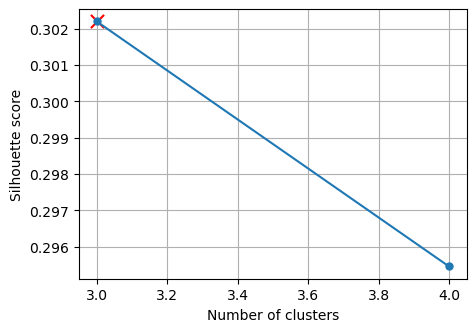

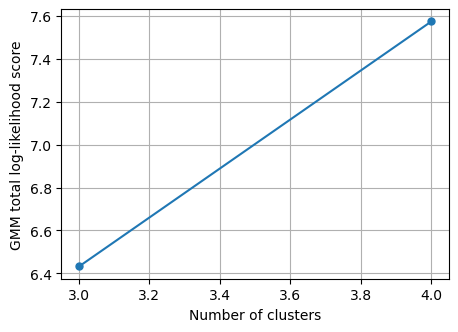

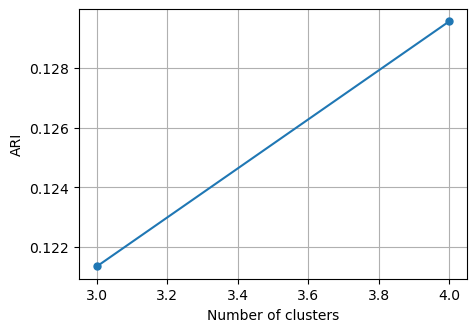

CPU times: total: 2min 7s
Wall time: 2min 12s


In [6]:

%%time
#GaussianMixture
#In this case use as hyper-parameter init_params = kmeans

#We computer the different scores for each iteration

n_cluster_list=[]
shs_list = []
ri_list = []
ari_list = []
log_l_list=[]
for n_clusters in range(3, 5):
    gmm = GaussianMixture(n_components=n_clusters, init_params='kmeans')
    
    print("test1---")
    cl_labels = gmm.fit_predict(X_s)
    silhouette  = silhouette_score(X_s, cl_labels)
    n_cluster_list.append(n_clusters)
    
    print("test2---")
    shs_list.append(silhouette)
    
    print("test3---")
    ri_list.append(rand_score(np.ravel(y), cl_labels))
    
    print("test4---")
    ari_list.append(adjusted_rand_score(np.ravel(y), cl_labels))
    
    print("test5---")
    log_l_list.append(gmm.score(X_s))
    


#2. Plot the silhouette score

# Get n_clusters leading to the highest silhouette
best_sh= np.max(shs_list)
best_n=n_cluster_list[np.argmax(shs_list)]
print("best k: ",best_n, " with corresponding silhouette: ", best_sh)


# Plot
plt.figure(figsize=(5, 3.5))
plt.plot(n_cluster_list,shs_list, marker='o', markersize=5)
plt.scatter(best_n, best_sh, color='r', marker='x', s=90)
plt.grid()
plt.xlabel('Number of clusters')
plt.ylabel('Silhouette score')
plt.show()


# Plot GMM total log-likelihood score
plt.figure(figsize=(5, 3.5))
plt.plot(n_cluster_list,log_l_list, marker='o', markersize=5)
plt.grid()
plt.xlabel('Number of clusters')
plt.ylabel('GMM total log-likelihood score')
plt.show()

# Plot ARI
plt.figure(figsize=(5, 3.5))
plt.plot(n_cluster_list,ari_list, marker='o', markersize=5)
plt.grid()
plt.xlabel('Number of clusters')
plt.ylabel('ARI')
plt.show()


Best initial k:  3  with corresponding silhouette:  0.44428451938206676
Best refined k:  3  with corresponding silhouette:  0.4429977987068069


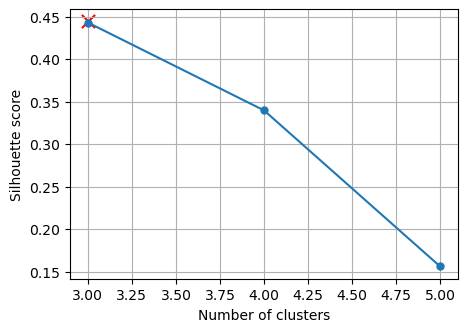

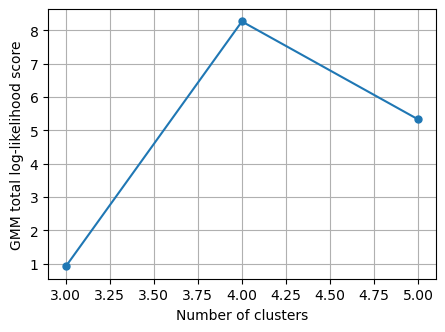

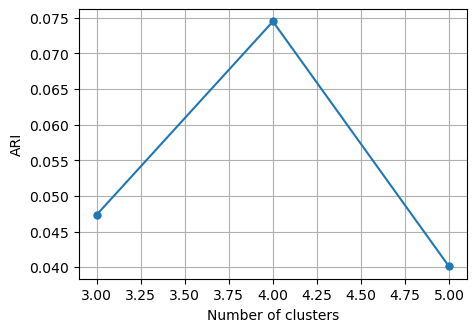

CPU times: total: 10min 42s
Wall time: 9min 33s


In [9]:
%%time

#GaussianMixture
#In this case use as hyper-parameter init_params = random

#We computer the different scores for each iteration

# Function to perform GMM clustering and store metrics
def perform_gmm_clustering(n_clusters, X_s, y):
    gmm = GaussianMixture(n_components=n_clusters, init_params='random')
    cl_labels = gmm.fit_predict(X_s)

    silhouette = silhouette_score(X_s, cl_labels)
    ri = rand_score(np.ravel(y), cl_labels)
    ari = adjusted_rand_score(np.ravel(y), cl_labels)
    log_l = gmm.score(X_s)

    return n_clusters, silhouette, ri, ari, log_l

# Initial broader search
n_cluster_list = []
shs_list = []
ri_list = []
ari_list = []
log_l_list = []

for n_clusters in range(3, 16, 3):  # Larger step size
    n, silhouette, ri, ari, log_l = perform_gmm_clustering(n_clusters, X_s, y)
    n_cluster_list.append(n)
    shs_list.append(silhouette)
    ri_list.append(ri)
    ari_list.append(ari)
    log_l_list.append(log_l)

# Find the best initial k
best_sh = np.max(shs_list)
best_n = n_cluster_list[np.argmax(shs_list)]
print("Best refined k: ", best_n, " with corresponding silhouette: ", best_sh, " ri: ", best_ri, " ari: ", best_ari, )


# Refine search around the best k found
refined_n_cluster_list = []
refined_shs_list = []
refined_ri_list = []
refined_ari_list = []
refined_log_l_list = []

# Define the refined range
refined_range = range(max(3, best_n - 2), min(16, best_n + 3))

for n_clusters in refined_range:
    n, silhouette, ri, ari, log_l = perform_gmm_clustering(n_clusters, X_s, y)
    refined_n_cluster_list.append(n)
    refined_shs_list.append(silhouette)
    refined_ri_list.append(ri)
    refined_ari_list.append(ari)
    refined_log_l_list.append(log_l)

# Find the best refined k
best_refined_sh = np.max(refined_shs_list)
best_refined_n = refined_n_cluster_list[np.argmax(refined_shs_list)]
best_refined_ri = refined_ri_list[np.argmax(refined_shs_list)]
best_refined_ari = refined_ari_list[np.argmax(refined_shs_list)]
print("Best refined k: ", best_refined_n, " with corresponding silhouette: ", best_refined_sh, " ri: ", best_refined_ri, " ari: ", best_refined_ari, )


# Plot
plt.figure(figsize=(5, 3.5))
plt.plot(refined_n_cluster_list,refined_shs_list, marker='o', markersize=5)
plt.scatter(best_n, best_sh, color='r', marker='x', s=90)
plt.grid()
plt.xlabel('Number of clusters')
plt.ylabel('Silhouette score')
plt.show()


# Plot GMM total log-likelihood score
plt.figure(figsize=(5, 3.5))
plt.plot(refined_n_cluster_list,refined_log_l_list, marker='o', markersize=5)
plt.grid()
plt.xlabel('Number of clusters')
plt.ylabel('GMM total log-likelihood score')
plt.show()

# Plot ARI
plt.figure(figsize=(5, 3.5))
plt.plot(refined_n_cluster_list,refined_ari_list, marker='o', markersize=5)
plt.grid()
plt.xlabel('Number of clusters')
plt.ylabel('ARI')
plt.show()


C:\Users\giova\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\giova\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\giova\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\giova\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of

Best initial k:  12  with corresponding silhouette:  0.6594669999070193


C:\Users\giova\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\giova\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\giova\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\giova\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of

Best refined k:  12  with corresponding silhouette:  0.6648851637231089


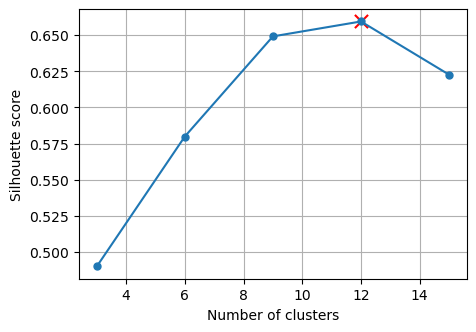

CPU times: total: 12min 36s
Wall time: 10min 8s


In [11]:
%%time

#K-means

# Function to perform KMeans clustering and store metrics
def perform_kmeans_clustering(n_clusters, X_s, y):
    kmeans = KMeans(n_clusters=n_clusters)
    cl_labels = kmeans.fit_predict(X_s)

    silhouette = silhouette_score(X_s, cl_labels)
    ri = rand_score(np.ravel(y), cl_labels)
    ari = adjusted_rand_score(np.ravel(y), cl_labels)
    inertia = kmeans.inertia_

    return n_clusters, silhouette, ri, ari, inertia

# Step 1: Initial broader search
n_cluster_list = []
shs_list = []
ri_list = []
ari_list = []
inertia_list = []

for n_clusters in range(3, 16, 3):  # Larger step size
    n, silhouette, ri, ari, inertia = perform_kmeans_clustering(n_clusters, X_s, y)
    n_cluster_list.append(n)
    shs_list.append(silhouette)
    ri_list.append(ri)
    ari_list.append(ari)
    inertia_list.append(inertia)

# Get n_clusters leading to the highest silhouette
best_sh = np.max(shs_list)
best_n = n_cluster_list[np.argmax(shs_list)]
print("Best initial k: ", best_n, " with corresponding silhouette: ", best_sh)

# Step 2: Refine search around the best k found
refined_n_cluster_list = []
refined_shs_list = []
refined_ri_list = []
refined_ari_list = []
refined_inertia_list = []

# Define the refined range
refined_range = range(max(3, best_n - 2), min(16, best_n + 3))

for n_clusters in refined_range:
    n, silhouette, ri, ari, inertia = perform_kmeans_clustering(n_clusters, X_s, y)
    refined_n_cluster_list.append(n)
    refined_shs_list.append(silhouette)
    refined_ri_list.append(ri)
    refined_ari_list.append(ari)
    refined_inertia_list.append(inertia)

# Get the best refined k
best_refined_sh = np.max(refined_shs_list)
best_refined_n = refined_n_cluster_list[np.argmax(refined_shs_list)]
print("Best refined k: ", best_refined_n, " with corresponding silhouette: ", best_refined_sh)


# Plot
plt.figure(figsize=(5, 3.5))
plt.plot(n_cluster_list,shs_list, marker='o', markersize=5)
plt.scatter(best_n, best_sh, color='r', marker='x', s=90)
plt.grid()
plt.xlabel('Number of clusters')
plt.ylabel('Silhouette score')
plt.show()

In [14]:
%%time

# Utilizziamo quindi il modello KMeans

# è stato deciso che 12 è il migliore dal precedente punto.
model = KMeans(n_clusters=12)

# Ottieni le etichette del cluster
cluster_labels = model.fit_predict(X_s)

# Calcola le metriche di clustering
silhouette = silhouette_score(X_s, cluster_labels)
ari = adjusted_rand_score(np.ravel(y), cluster_labels)

# Stampa le metriche
print(f"Silhouette Score: {silhouette}")
print(f"Adjusted Rand Index: {ari}")


C:\Users\giova\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


Silhouette Score: 0.6305310607044544
Adjusted Rand Index: 0.36323675343802897
CPU times: total: 1min 1s
Wall time: 1min 2s


In [16]:
%%time


# Analizza il numero di flussi per cluster
cluster_df = pd.DataFrame({'Cluster': cluster_labels, 'NumFlows': ddos_data.index}).reset_index()

CPU times: total: 0 ns
Wall time: 5.79 ms


In [ ]:
%%time

# Plot ECDF per il numero di flussi per cluster
plt.figure(figsize=(8, 5))
sns.ecdfplot(data=cluster_df, x='NumFlows', hue='Cluster',palette='coolwarm')
plt.title('ECDF of Number of Flows per Cluster')
plt.xlabel('Number of Flows')
plt.ylabel('ECDF')
plt.show()